# Sales Data Analysis for a Retail Chain

# Load and Understand the Data

In [1]:
import pandas as pd

# Load the CSV files
transactions = pd.read_csv("C:/Users/hitha sunil/Downloads/archive (26)/Retail_Data_Transactions.csv")
responses = pd.read_csv("C:/Users/hitha sunil/Downloads/archive (26)/Retail_Data_Response.csv")

# Show the first few rows of each
print("🔹 Transactions Data:")
print(transactions.head())

print("\n🔹 Response Data:")
print(responses.head())

# Show column names
print("\n✅ Columns in Transactions:", transactions.columns.tolist())
print("✅ Columns in Responses:", responses.columns.tolist())


🔹 Transactions Data:
  customer_id trans_date  tran_amount
0      CS5295  11-Feb-13           35
1      CS4768  15-Mar-15           39
2      CS2122  26-Feb-13           52
3      CS1217  16-Nov-11           99
4      CS1850  20-Nov-13           78

🔹 Response Data:
  customer_id  response
0      CS1112         0
1      CS1113         0
2      CS1114         1
3      CS1115         1
4      CS1116         1

✅ Columns in Transactions: ['customer_id', 'trans_date', 'tran_amount']
✅ Columns in Responses: ['customer_id', 'response']


# Merge and Clean the Data

In [2]:
# Rename customer_id to customer in both files for merging
transactions.rename(columns={"customer_id": "customer"}, inplace=True)
responses.rename(columns={"customer_id": "customer"}, inplace=True)

# Merge both files using customer ID
df = pd.merge(transactions, responses, on="customer", how="left")

# Convert date column to datetime format
df["trans_date"] = pd.to_datetime(df["trans_date"], errors='coerce')

# Fill missing responses with 0 (means not responded)
df["response"] = df["response"].fillna(0).astype(int)

# Add extra columns for analysis
df["month"] = df["trans_date"].dt.month
df["year"] = df["trans_date"].dt.year
df["month_year"] = df["trans_date"].dt.to_period("M").astype(str)

print("✅ Merged and cleaned data (first 5 rows):")
print(df.head())


✅ Merged and cleaned data (first 5 rows):
  customer trans_date  tran_amount  response  month  year month_year
0   CS5295 2013-02-11           35         1      2  2013    2013-02
1   CS4768 2015-03-15           39         1      3  2015    2015-03
2   CS2122 2013-02-26           52         0      2  2013    2013-02
3   CS1217 2011-11-16           99         0     11  2011    2011-11
4   CS1850 2013-11-20           78         0     11  2013    2013-11


# Basic Analysis

Count of Responders vs Non-Responders

In [3]:
response_counts = df["response"].value_counts().rename(index={0: "Not Responded", 1: "Responded"})
print("📌 How many customers responded or not:")
print(response_counts)


📌 How many customers responded or not:
Not Responded    111158
Responded         13842
Name: response, dtype: int64


Average Transaction Amount by Group

In [4]:
avg_transaction = df.groupby("response")["tran_amount"].mean().reset_index()
avg_transaction["response"] = avg_transaction["response"].map({0: "Not Responded", 1: "Responded"})

print("📌 Average Spend by Customers:")
print(avg_transaction)


📌 Average Spend by Customers:
        response  tran_amount
0  Not Responded    64.488755
1      Responded    69.032510


Monthly Sales Trend

In [5]:
monthly_sales = df.groupby("month_year")["tran_amount"].sum().reset_index()

print("📌 Monthly Sales (Total Transaction Amount):")
print(monthly_sales.head())


📌 Monthly Sales (Total Transaction Amount):
  month_year  tran_amount
0    2011-05        98951
1    2011-06       174527
2    2011-07       178097
3    2011-08       188631
4    2011-09       169173


In [8]:
import pandas as pd
import os

# Directory path where you want to save the file
output_dir = r"C:/Users/hitha sunil/Documents/Internship/ProjectDashboard"

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Full file path
output_file = os.path.join(output_dir, "Retail_Sales_Dashboard_Data.xlsx")

# Create and save Excel with multiple sheets
with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Cleaned_Data", index=False)
    response_counts.to_excel(writer, sheet_name="Response_Counts", index=False)
    avg_transaction.to_excel(writer, sheet_name="Avg_Transaction", index=False)
    monthly_sales.to_excel(writer, sheet_name="Monthly_Sales", index=False)

print(f"✅ Excel exported to: {output_file}")


✅ Excel exported to: C:/Users/hitha sunil/Documents/Internship/ProjectDashboard\Retail_Sales_Dashboard_Data.xlsx


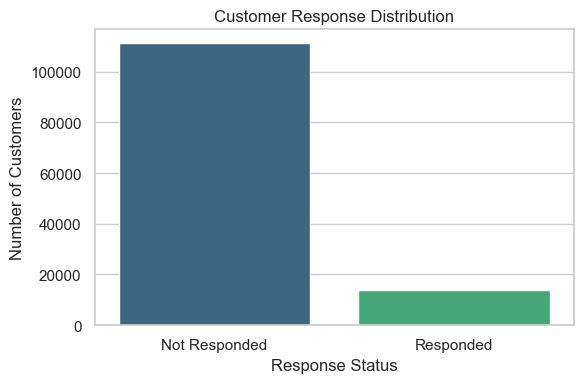

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Customer Response Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Response Status")
plt.tight_layout()
plt.show()


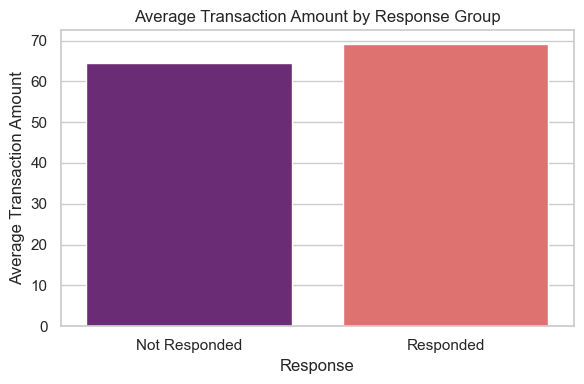

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_transaction, x="response", y="tran_amount", palette="magma")
plt.title("Average Transaction Amount by Response Group")
plt.ylabel("Average Transaction Amount")
plt.xlabel("Response")
plt.tight_layout()
plt.show()


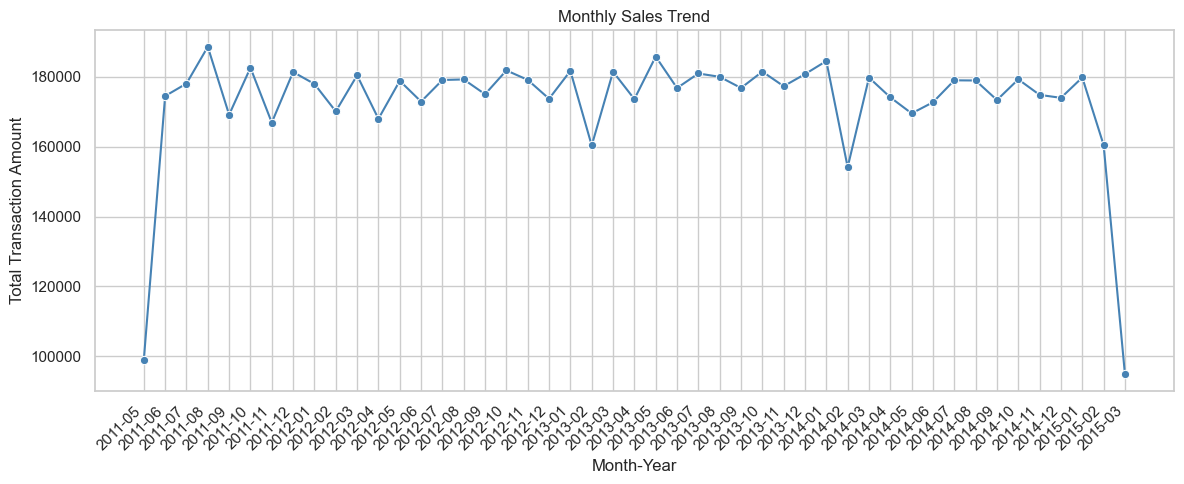

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="month_year", y="tran_amount", marker="o", color="steelblue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Transaction Amount")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.show()


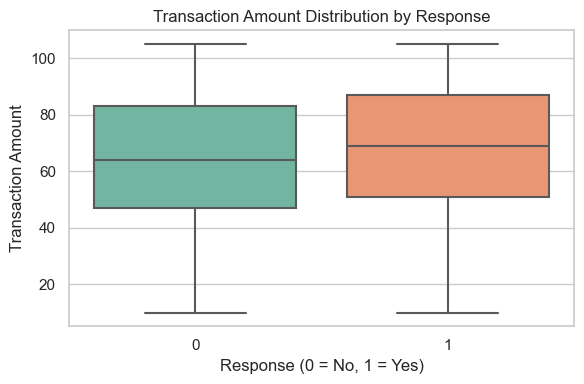

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="response", y="tran_amount", palette="Set2")
plt.title("Transaction Amount Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()


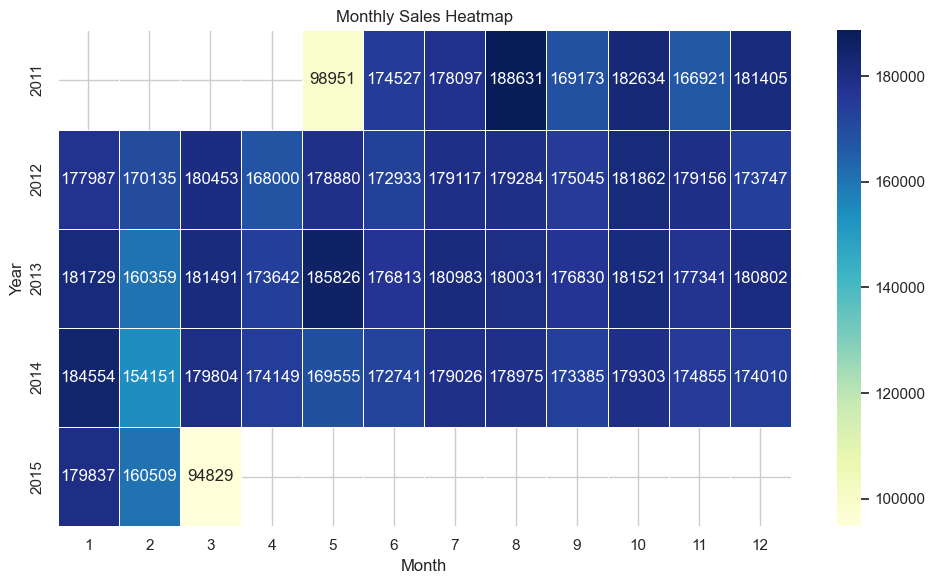

In [13]:
# Create pivot table
heatmap_data = df.pivot_table(values="tran_amount", index="year", columns="month", aggfunc="sum")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


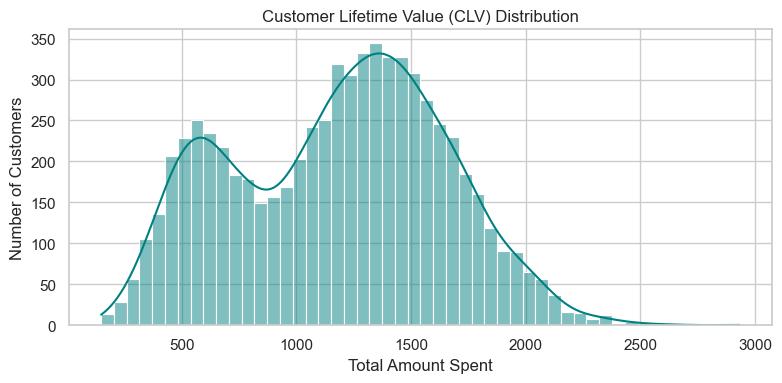

In [14]:
# Calculate CLV per customer
clv = df.groupby("customer")["tran_amount"].sum().reset_index().rename(columns={"tran_amount": "total_spent"})

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(clv["total_spent"], bins=50, kde=True, color="teal")
plt.title("Customer Lifetime Value (CLV) Distribution")
plt.xlabel("Total Amount Spent")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


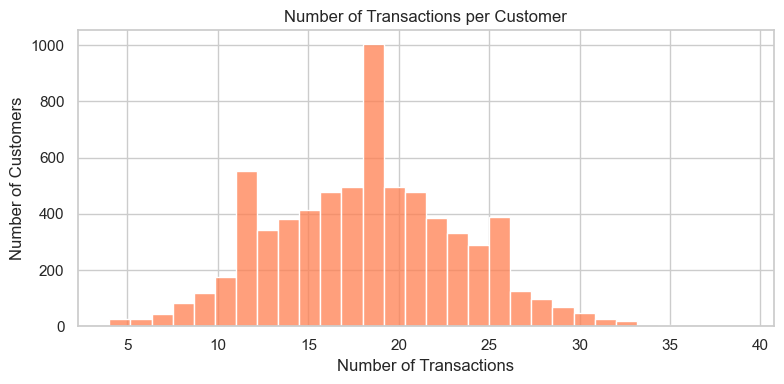

In [15]:
# Calculate transaction frequency per customer
txn_count = df.groupby("customer").size().reset_index(name="num_transactions")

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(txn_count["num_transactions"], bins=30, color="coral")
plt.title("Number of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


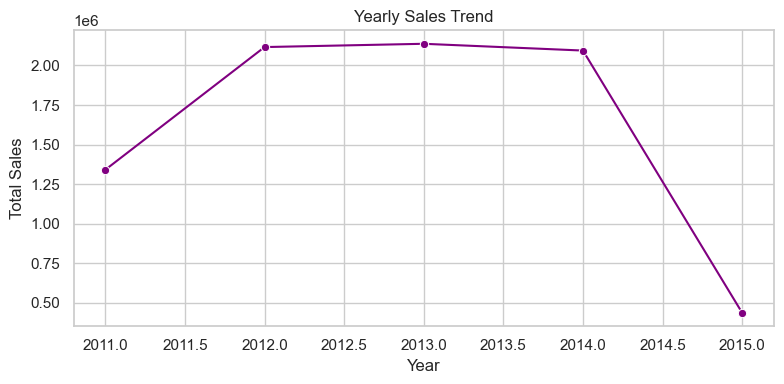

In [16]:
yearly_sales = df.groupby("year")["tran_amount"].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_sales, x="year", y="tran_amount", marker='o', color='purple')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


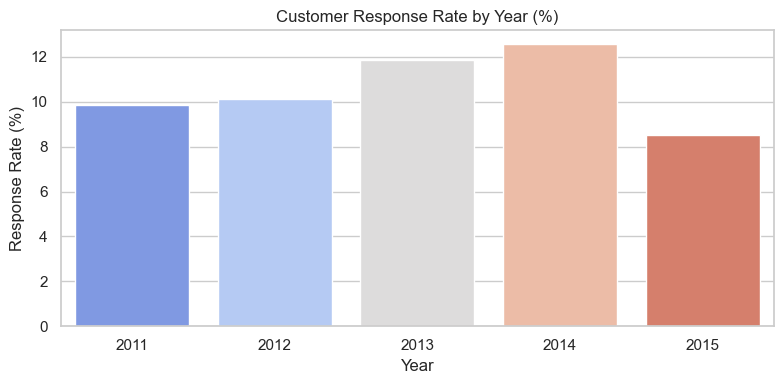

In [17]:
response_by_year = df.groupby("year")["response"].mean().reset_index()
response_by_year["response_rate"] = response_by_year["response"] * 100

plt.figure(figsize=(8, 4))
sns.barplot(data=response_by_year, x="year", y="response_rate", palette="coolwarm")
plt.title("Customer Response Rate by Year (%)")
plt.ylabel("Response Rate (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


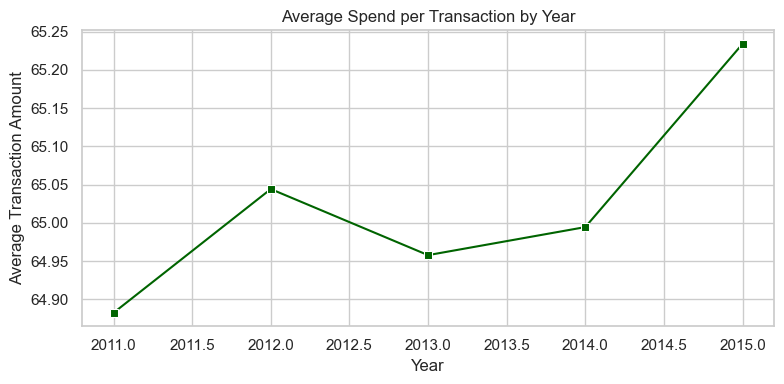

In [18]:
avg_yearly_spend = df.groupby("year")["tran_amount"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_yearly_spend, x="year", y="tran_amount", marker='s', color="darkgreen")
plt.title("Average Spend per Transaction by Year")
plt.xlabel("Year")
plt.ylabel("Average Transaction Amount")
plt.tight_layout()
plt.show()


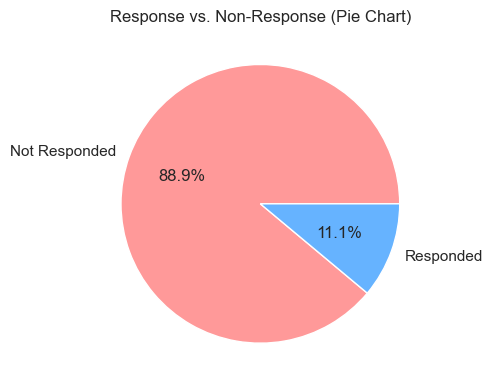

In [19]:
plt.figure(figsize=(5, 5))
plt.pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Response vs. Non-Response (Pie Chart)")
plt.tight_layout()
plt.show()


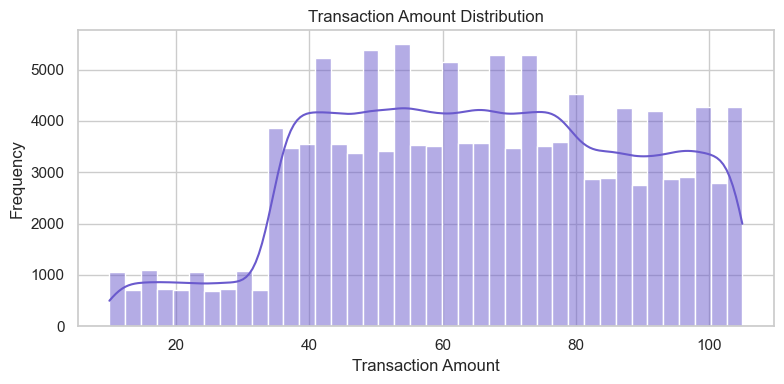

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df["tran_amount"], bins=40, kde=True, color="slateblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


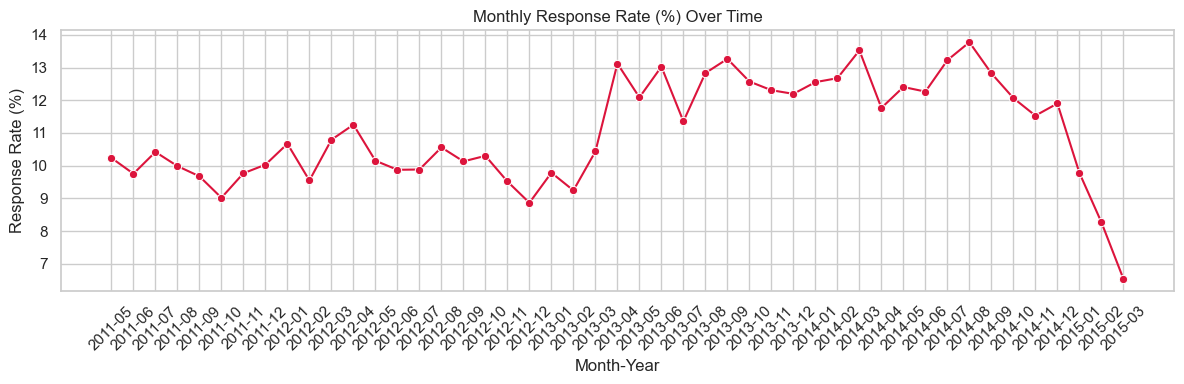

In [21]:
monthly_response = df.groupby("month_year")["response"].mean().reset_index()
monthly_response["response_rate"] = monthly_response["response"] * 100

plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_response, x="month_year", y="response_rate", marker='o', color="crimson")
plt.title("Monthly Response Rate (%) Over Time")
plt.xticks(rotation=45)
plt.ylabel("Response Rate (%)")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.show()


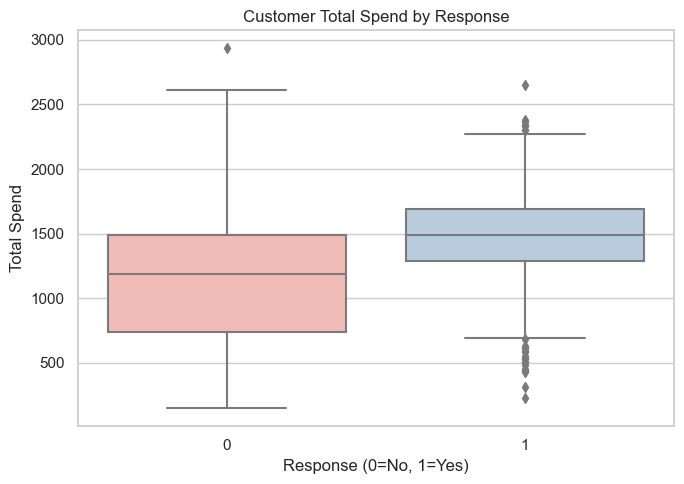

In [22]:
customer_summary = df.groupby("customer").agg({
    "tran_amount": "sum",
    "response": "max"  # whether they ever responded
}).reset_index()

plt.figure(figsize=(7, 5))
sns.boxplot(data=customer_summary, x="response", y="tran_amount", palette="Pastel1")
plt.title("Customer Total Spend by Response")
plt.xlabel("Response (0=No, 1=Yes)")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


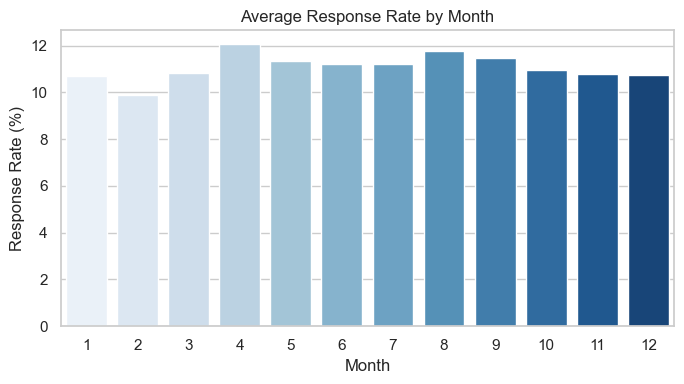

In [23]:
response_by_month = df.groupby("month")["response"].mean().reset_index()
response_by_month["response_rate"] = response_by_month["response"] * 100

plt.figure(figsize=(7, 4))
sns.barplot(data=response_by_month, x="month", y="response_rate", palette="Blues")
plt.title("Average Response Rate by Month")
plt.xlabel("Month")
plt.ylabel("Response Rate (%)")
plt.tight_layout()
plt.show()


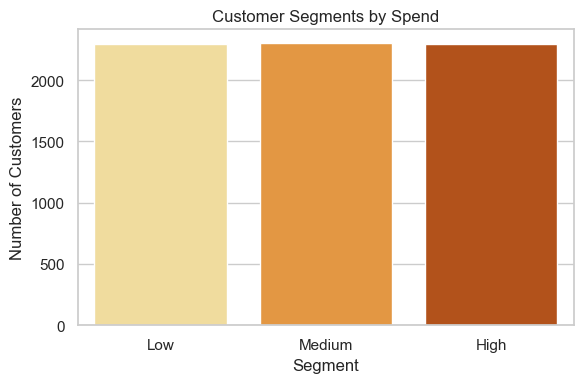

In [24]:
clv["segment"] = pd.qcut(clv["total_spent"], q=3, labels=["Low", "Medium", "High"])

segment_counts = clv["segment"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="YlOrBr")
plt.title("Customer Segments by Spend")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


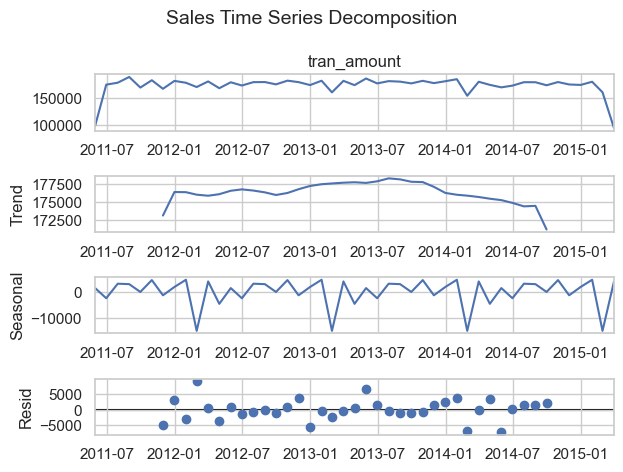

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure monthly aggregation
df_monthly = df.groupby("trans_date")["tran_amount"].sum().resample("M").sum()

# Drop NA values
df_monthly.dropna(inplace=True)

# Decompose
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.suptitle("Sales Time Series Decomposition", fontsize=14)
plt.tight_layout()
plt.show()


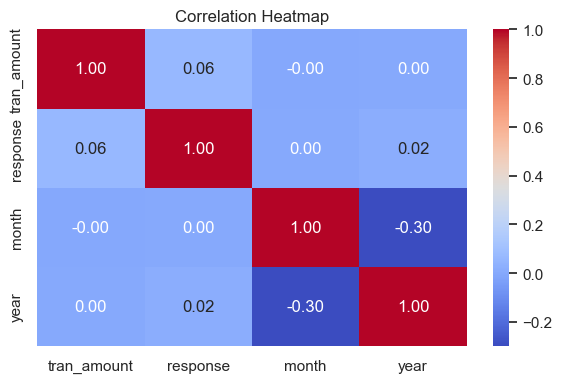

In [26]:
corr_data = df[["tran_amount", "response", "month", "year"]]
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


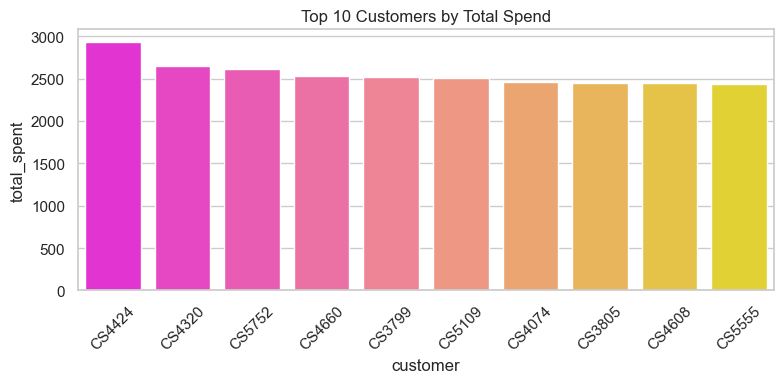

In [27]:
top_customers = clv.sort_values(by="total_spent", ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_customers, x="customer", y="total_spent", palette="spring")
plt.title("Top 10 Customers by Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


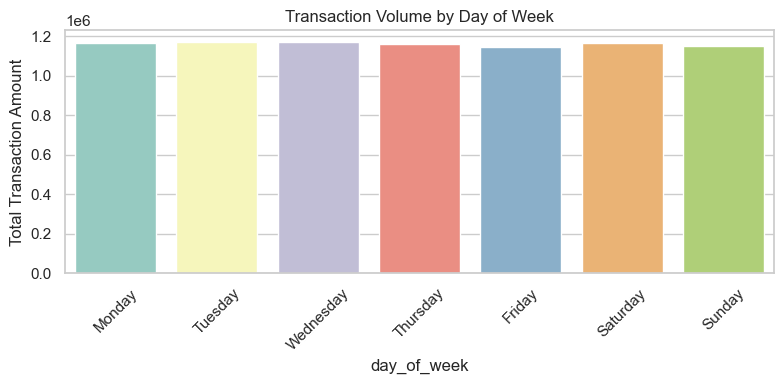

In [28]:
df["day_of_week"] = df["trans_date"].dt.day_name()

dow_sales = df.groupby("day_of_week")["tran_amount"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=dow_sales, x="day_of_week", y="tran_amount", palette="Set3")
plt.title("Transaction Volume by Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Total Transaction Amount")
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style
sns.set(style="whitegrid")

# Create plot output directory
plot_dir = r"C:/Users/hitha sunil/Documents/Internship/ProjectDashboard/plots"
os.makedirs(plot_dir, exist_ok=True)

# Load data
df = pd.read_excel("C:/Users/hitha sunil/Documents/Internship/ProjectDashboard/Retail_Sales_Dashboard_Data.xlsx", sheet_name="Cleaned_Data")

# 📊 1. Response Distribution
response_counts = df["response"].value_counts().rename(index={0: "Not Responded", 1: "Responded"})
plt.figure(figsize=(6, 4))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Customer Response Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Response")
plt.tight_layout()
plt.savefig(f"{plot_dir}/response_distribution.png")
plt.close()

# 📈 2. Monthly Sales Trend
monthly_sales = df.groupby("month_year")["tran_amount"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="month_year", y="tran_amount", marker="o", color="steelblue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Transaction Amount")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.savefig(f"{plot_dir}/monthly_sales.png")
plt.close()

# 📊 3. Average Spend by Response Group
avg_transaction = df.groupby("response")["tran_amount"].mean().reset_index()
avg_transaction["response"] = avg_transaction["response"].map({0: "Not Responded", 1: "Responded"})
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_transaction, x="response", y="tran_amount", palette="magma")
plt.title("Average Spend by Customers")
plt.ylabel("Average Transaction Amount")
plt.xlabel("Response")
plt.tight_layout()
plt.savefig(f"{plot_dir}/avg_spend_response.png")
plt.close()

# 📈 4. Monthly Response Rate
monthly_response = df.groupby("month_year")["response"].mean().reset_index()
monthly_response["response_rate"] = monthly_response["response"] * 100
plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_response, x="month_year", y="response_rate", marker='o', color="crimson")
plt.title("Monthly Response Rate (%) Over Time")
plt.xticks(rotation=45)
plt.ylabel("Response Rate (%)")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.savefig(f"{plot_dir}/monthly_response_rate.png")
plt.close()

# 📊 5. Boxplot: Transaction Amount by Response
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="response", y="tran_amount", palette="Set2")
plt.title("Transaction Amount Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.savefig(f"{plot_dir}/boxplot_spend_response.png")
plt.close()

# 📊 6. CLV Distribution
clv = df.groupby("customer")["tran_amount"].sum().reset_index().rename(columns={"tran_amount": "total_spent"})
plt.figure(figsize=(8, 4))
sns.histplot(clv["total_spent"], bins=50, kde=True, color="teal")
plt.title("Customer Lifetime Value (CLV) Distribution")
plt.xlabel("Total Amount Spent")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig(f"{plot_dir}/clv_distribution.png")
plt.close()

# 📊 7. Top 10 Customers by Spend
top_customers = clv.sort_values(by="total_spent", ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(data=top_customers, x="customer", y="total_spent", palette="spring")
plt.title("Top 10 Customers by Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{plot_dir}/top10_customers.png")
plt.close()

# 📊 8. Heatmap: Sales by Year and Month
df["month"] = df["trans_date"].dt.month
df["year"] = df["trans_date"].dt.year
heatmap_data = df.pivot_table(values="tran_amount", index="year", columns="month", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.savefig(f"{plot_dir}/sales_heatmap.png")
plt.close()

# 📊 9. Pie Chart – Response Distribution
plt.figure(figsize=(5, 5))
plt.pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Response vs. Non-Response (Pie Chart)")
plt.tight_layout()
plt.savefig(f"{plot_dir}/response_pie.png")
plt.close()

# 📊 10. Transaction Amount Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df["tran_amount"], bins=40, kde=True, color="slateblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(f"{plot_dir}/tran_amount_distribution.png")
plt.close()

print("✅ All plots saved to:", plot_dir)


✅ All plots saved to: C:/Users/hitha sunil/Documents/Internship/ProjectDashboard/plots
